In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from data_handler import DataHandler, get_xy, zscore_data, apply_zscore
from calculations import Calculations

dh =  DataHandler("lfw20.csv")
data = dh.parse_data_no_header()
data = dh.shuffle_data(data)

X, y = get_xy(data)
X /= 255
means, stds = zscore_data(X)
X = apply_zscore(means, stds, X)

def PCA(data_, out_dimensions=2):
    sigma = np.cov(data_, rowvar=False)
    # w = values
    # v = vectors
    w, v = np.linalg.eigh(sigma)
    max_indices = get_max_val(v, w, out_dimensions)
    proj_data = np.dot(data_, v[:, max_indices])
    projected_data_white = proj_data/np.sqrt(w[max_indices].reshape((1, -1)))
    return proj_data, projected_data_white, v, w, v[:, max_indices]

def get_max_val(vectors, values, dimensions=2):
    max_vector_indices = np.argsort(values)
    return max_vector_indices[-dimensions:][::-1]

In [ ]:
%matplotlib inline

<h1>Primary Component</h1>

In [ ]:
PCA_data, PCA_data_w, vectors, values, maxw = PCA(X, 1)

In [ ]:
vectors.shape, values.shape

((5655, 5655), (5655,))

<h1> Original Image </h1>

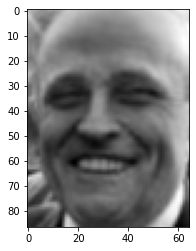

In [ ]:
reconstructedX = (X[0]*255)*stds + means
plt.imshow(reconstructedX.reshape(87,65),  cmap='gray')
plt.show()

<h1>Reconstructed Largest Principle Component</h1>

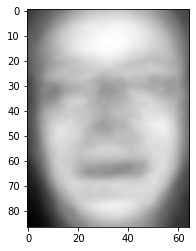

In [ ]:
plt.imshow(maxw[:, 0].reshape(87,65),  cmap='gray')

<h1>Reconstructed Image at X[0] on Best Principle Component</h1>

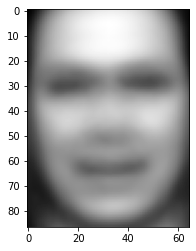

In [20]:
reconstruct = np.dot(maxw, PCA_data.T).T
reconstruct = (reconstruct)*stds + means
plt.imshow(reconstruct[0, :].reshape(87,65),  cmap='gray')
plt.show()

<h1>95% Reconstruction</h1>

In [ ]:
sigma = np.cov(X, rowvar=False)
w, v = np.linalg.eig(sigma)

In [ ]:
full_max_indices = get_max_val(v, w, X.shape[1])
full_max_vals = w[full_max_indices]

In [ ]:
np.sum(np.abs(full_max_vals))

5655.000000000034

In [ ]:
alpha = 0.0
K = 0
while alpha <= 0.95 and K < X.shape[1]:
    K += 1
    max_indices = get_max_val(v, w, K)
    sub_max_vals = w[max_indices]
    proj_data = np.dot(X, v[:, max_indices])
    alpha = np.sum(np.abs(sub_max_vals)) / np.sum(np.abs(full_max_vals))

180 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  49  48  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  95  94  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 135 134 136 137 139 138 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 178 179 181 180]
(1240, 180) (5655, 180)
(1240, 5655)


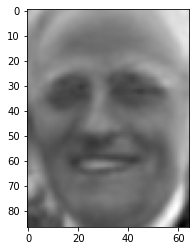

In [ ]:
print(K, max_indices)

proj_data = np.dot(X, v[:, :K])
print(proj_data.shape, v[:, :K].shape)
reconstruct = np.dot(v[:, :K], proj_data.T).T
reconstruct = (reconstruct*255)*stds + means
unzscore = (reconstruct * 255) * stds + means
print(unzscore.shape)
sample = np.array(unzscore[0, :].reshape(87,65).real, dtype=float)
plt.imshow(sample,  cmap='gray')